<a href="https://colab.research.google.com/github/Deepak-Mewada/Miscellaneous/blob/main/VisualisingWeights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Extract the initial weights of the network
initial_weights = model.get_weights()

# Train the network on some data
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

# Extract the trained weights of the network
trained_weights = model.get_weights()

# Compare the weight space
for i in range(len(initial_weights)):
    print(f"Layer {i+1}:")
    print(f"Initial weight shape: {initial_weights[i].shape}")
    print(f"Trained weight shape: {trained_weights[i].shape}")
    print(f"Initial weight mean: {initial_weights[i].mean()}")
    print(f"Trained weight mean: {trained_weights[i].mean()}")
    print(f"Initial weight standard deviation: {initial_weights[i].std()}")
    print(f"Trained weight standard deviation: {trained_weights[i].std()}")


Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2009 - accuracy: 0.9394
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0854 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0586 - accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0440 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
iw= initial_weights
iw

In [ ]:
tw = trained_weights
tw

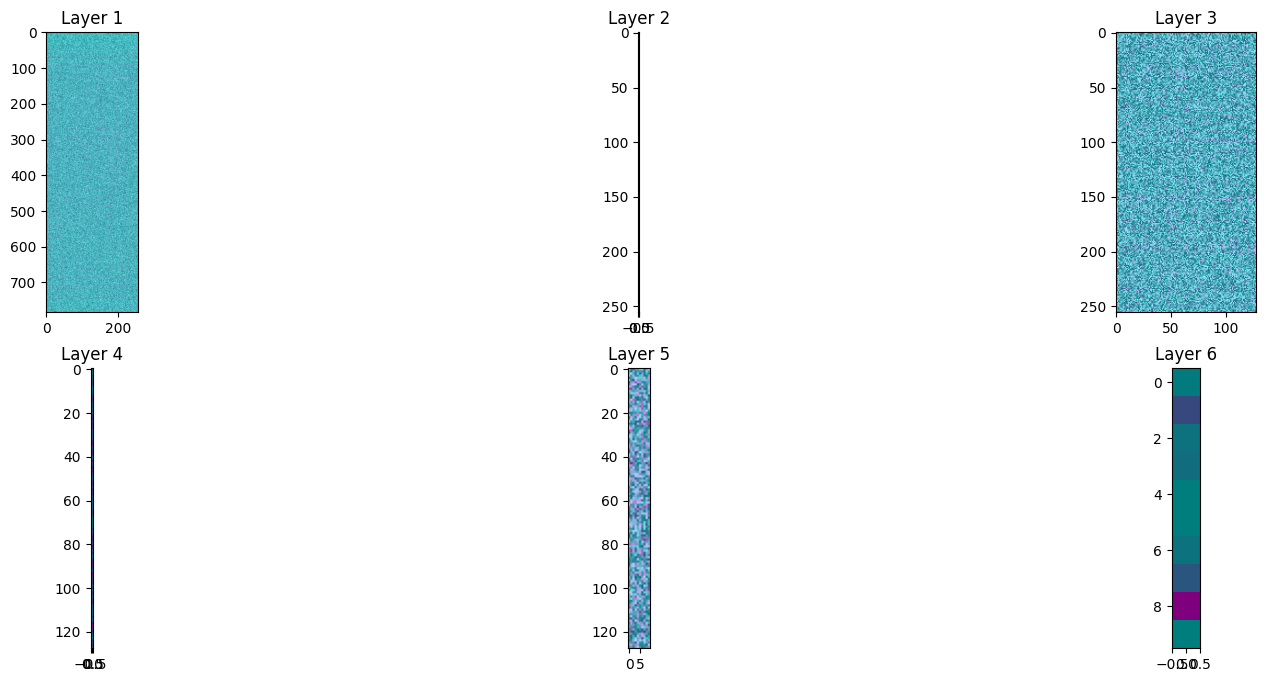

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the initial and trained weight matrices
# initial_weights = model.get_weights()
# trained_weights = model.get_weights()

# Reshape the weight matrices to 2D matrices
initial_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in initial_weights]
trained_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in trained_weights]

# Plot the weight matrices as heatmaps
fig, axs = plt.subplots(2, len(initial_weights)//2, figsize=(20, 8))
for i in range(len(initial_weights)):
    row, col = divmod(i, len(initial_weights)//2)
    axs[row, col].set_title(f"Layer {i+1}")
    axs[row, col].imshow(np.abs(initial_weights[i]), cmap='gray')
    axs[row, col].imshow(np.abs(trained_weights[i]), cmap='cool', alpha=0.5)
plt.show()


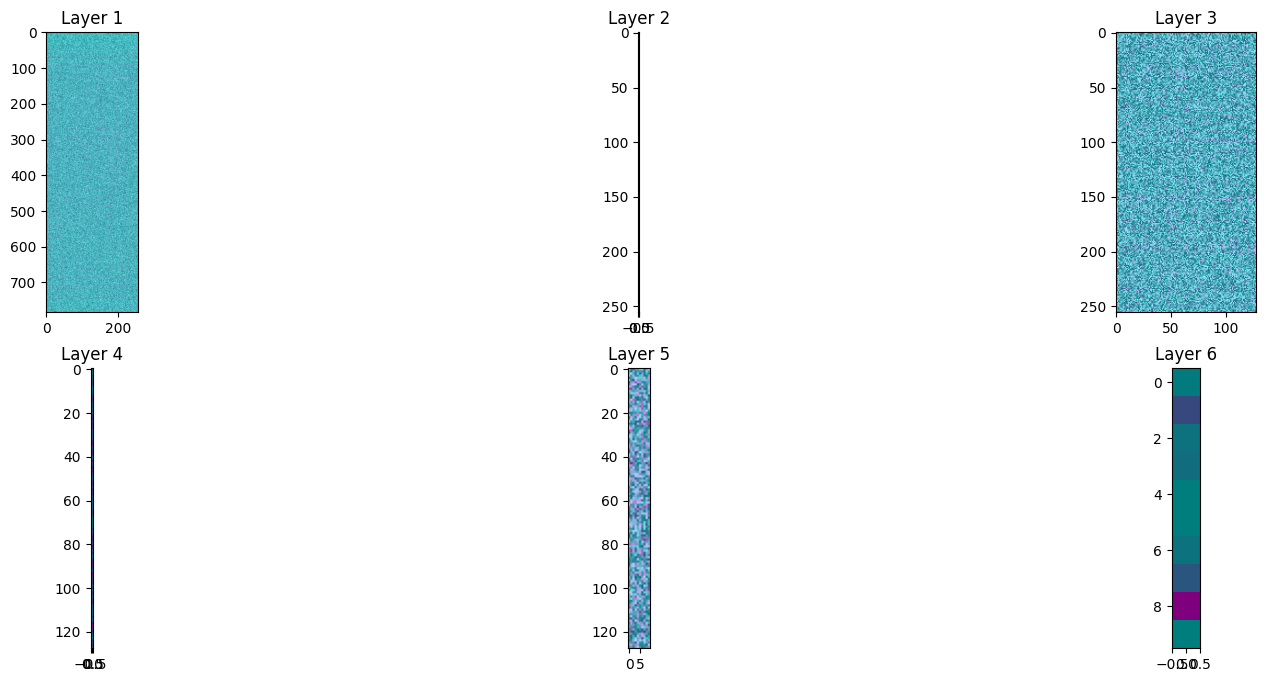

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# # Extract the initial and trained weight matrices
# initial_weights = model.get_weights()
# trained_weights = model.get_weights()

# Reshape the weight matrices to 2D matrices
initial_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in initial_weights]
trained_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in trained_weights]

# Plot the weight matrices as heatmaps
fig, axs = plt.subplots(2, len(initial_weights)//2, figsize=(20, 8))
for i in range(len(initial_weights)):
    row, col = divmod(i, len(initial_weights)//2)
    axs[row, col].set_title(f"Layer {i+1}")
    axs[row, col].imshow(np.abs(initial_weights[i]), cmap='gray')
    axs[row, col].imshow(np.abs(trained_weights[i]), cmap='cool', alpha=0.5)
plt.show()


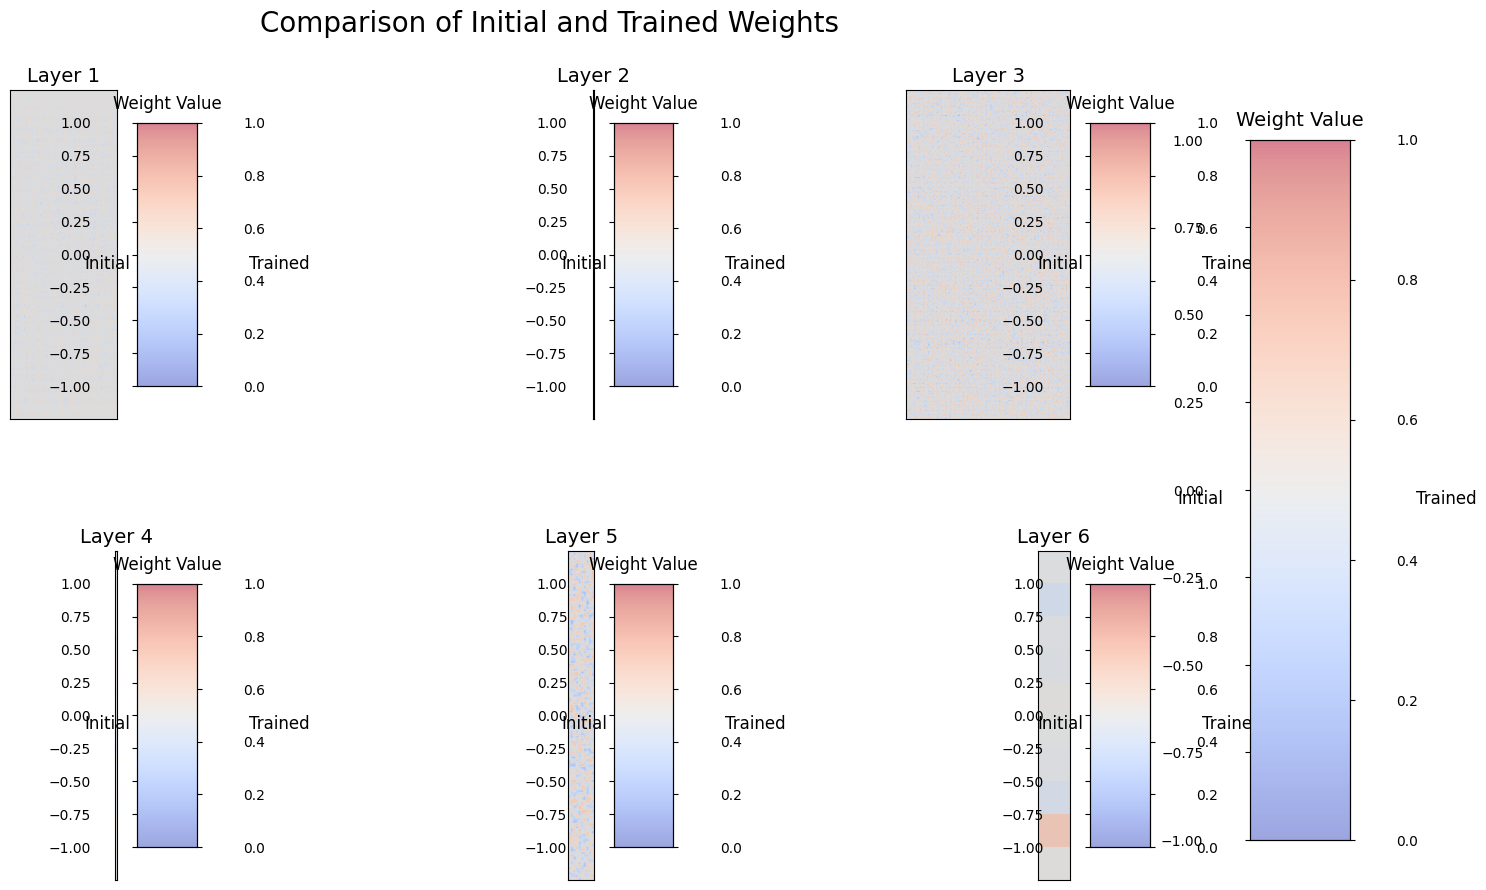

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# # Extract the initial and trained weight matrices
# initial_weights = model.get_weights()
# trained_weights = model.get_weights()

# Reshape the weight matrices to 2D matrices
initial_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in initial_weights]
trained_weights = [w.reshape(-1, 1) if len(w.shape) == 1 else w for w in trained_weights]

# Normalize the weight values
norm = Normalize(vmin=-1, vmax=1)

# Plot the weight matrices as heatmaps
fig, axs = plt.subplots(2, len(initial_weights)//2, figsize=(20, 10))
fig.suptitle('Comparison of Initial and Trained Weights', fontsize=20)
for i in range(len(initial_weights)):
    row, col = divmod(i, len(initial_weights)//2)
    axs[row, col].set_title(f"Layer {i+1}", fontsize=14)
    im = axs[row, col].imshow(initial_weights[i], cmap='coolwarm', norm=norm)
    im = axs[row, col].imshow(trained_weights[i], cmap='coolwarm', alpha=0.5, norm=norm)
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].tick_params(axis='both', which='both', length=0)
    cbar = fig.colorbar(im, ax=axs[row, col], shrink=0.8)
    cbar.ax.set_title('Weight Value', pad=10, fontsize=12)
    cbar.ax.yaxis.set_label_coords(-0.5, 0.5)
    cbar.ax.set_ylabel('Initial', rotation=0, labelpad=10, fontsize=12)
    cbar.ax.yaxis.set_tick_params(pad=30)
    cbar.ax2 = cbar.ax.twinx()
    cbar.ax2.set_ylabel('Trained', rotation=0, labelpad=10, fontsize=12)
    cbar.ax2.yaxis.set_tick_params(pad=30)
fig.subplots_adjust(right=0.8, wspace=0.2, hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title('Weight Value', pad=10, fontsize=14)
cbar.ax.yaxis.set_label_coords(-0.5, 0.5)
cbar.ax.set_ylabel('Initial', rotation=0, labelpad=20, fontsize=12)
cbar.ax.yaxis.set_tick_params(pad=30)
cbar.ax2 = cbar.ax.twinx()
cbar.ax2.set_ylabel('Trained', rotation=0, labelpad=20, fontsize=12)
cbar.ax2.yaxis.set_tick_params(pad=30)
plt.subplots_adjust(top=0.9)
plt.show()


In [16]:
# Build the neural network
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

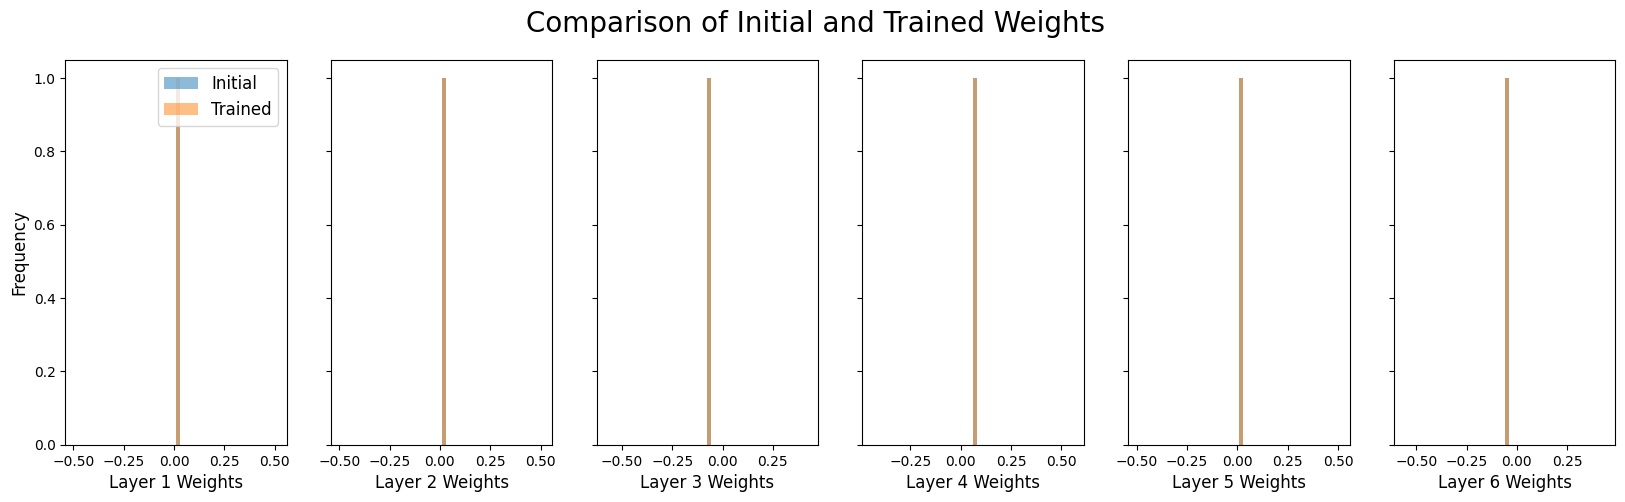

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get the initial and trained weights of the model
# initial_weights = model.get_weights()
# trained_weights = trained_model.get_weights()

# Flatten the weights into a 1D array
initial_weights_flat = np.concatenate([w.flatten() for w in initial_weights])
trained_weights_flat = np.concatenate([w.flatten() for w in trained_weights])

# Plot the weight distributions using a histogram
fig, axs = plt.subplots(1, len(initial_weights), figsize=(20, 5), sharey=True)
fig.suptitle('Comparison of Initial and Trained Weights', fontsize=20)
for i in range(len(initial_weights)):
    axs[i].hist(initial_weights_flat[i], bins=50, alpha=0.5, label='Initial')
    axs[i].hist(trained_weights_flat[i], bins=50, alpha=0.5, label='Trained')
    axs[i].set_xlabel(f'Layer {i+1} Weights', fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].legend(fontsize=12)
plt.show()


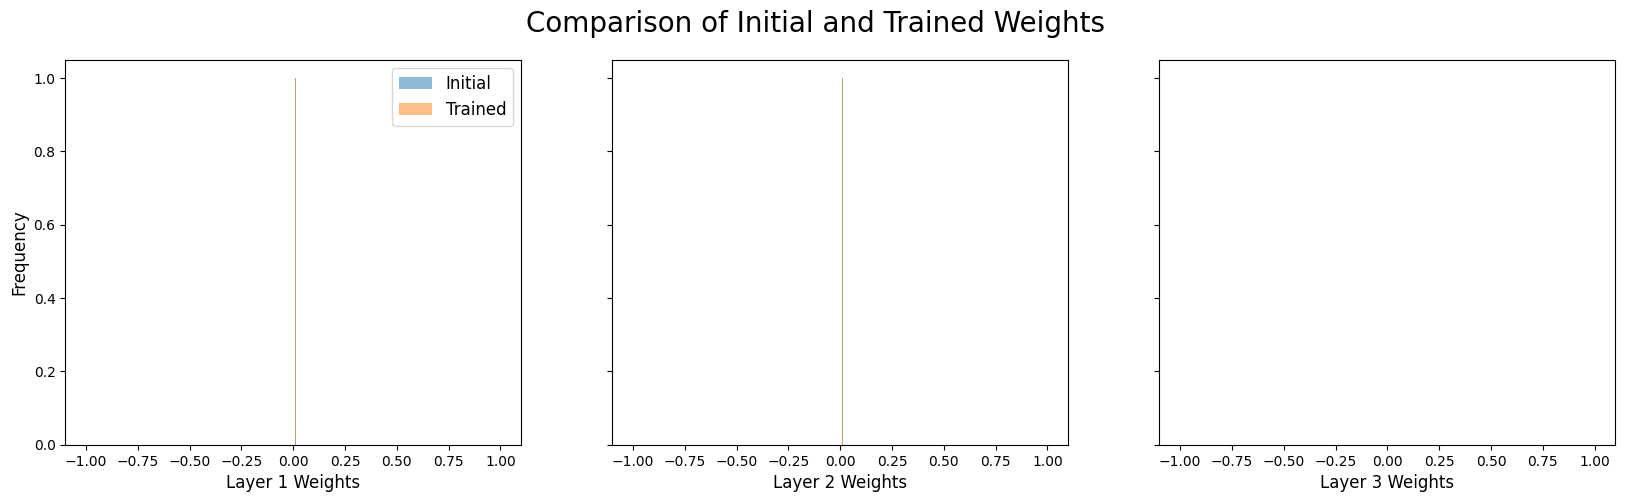

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# # Get the initial and trained weights of the model
# initial_weights = model.get_weights()
# trained_weights = trained_model.get_weights()

# Flatten the weights into a 1D array
initial_weights_flat = np.concatenate([w.flatten() for w in initial_weights])
trained_weights_flat = np.concatenate([w.flatten() for w in trained_weights])

# Plot the weight distributions using a histogram
fig, axs = plt.subplots(1, len(initial_weights), figsize=(20, 5), sharey=True)
fig.suptitle('Comparison of Initial and Trained Weights', fontsize=20)
for i in range(len(initial_weights)):
    axs[i].hist(initial_weights_flat[i], bins=500, range=(-1, 1), alpha=0.5, label='Initial')
    axs[i].hist(trained_weights_flat[i], bins=500, range=(-1, 1), alpha=0.5, label='Trained')
    axs[i].set_xlabel(f'Layer {i+1} Weights', fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].legend(fontsize=12)
plt.show()


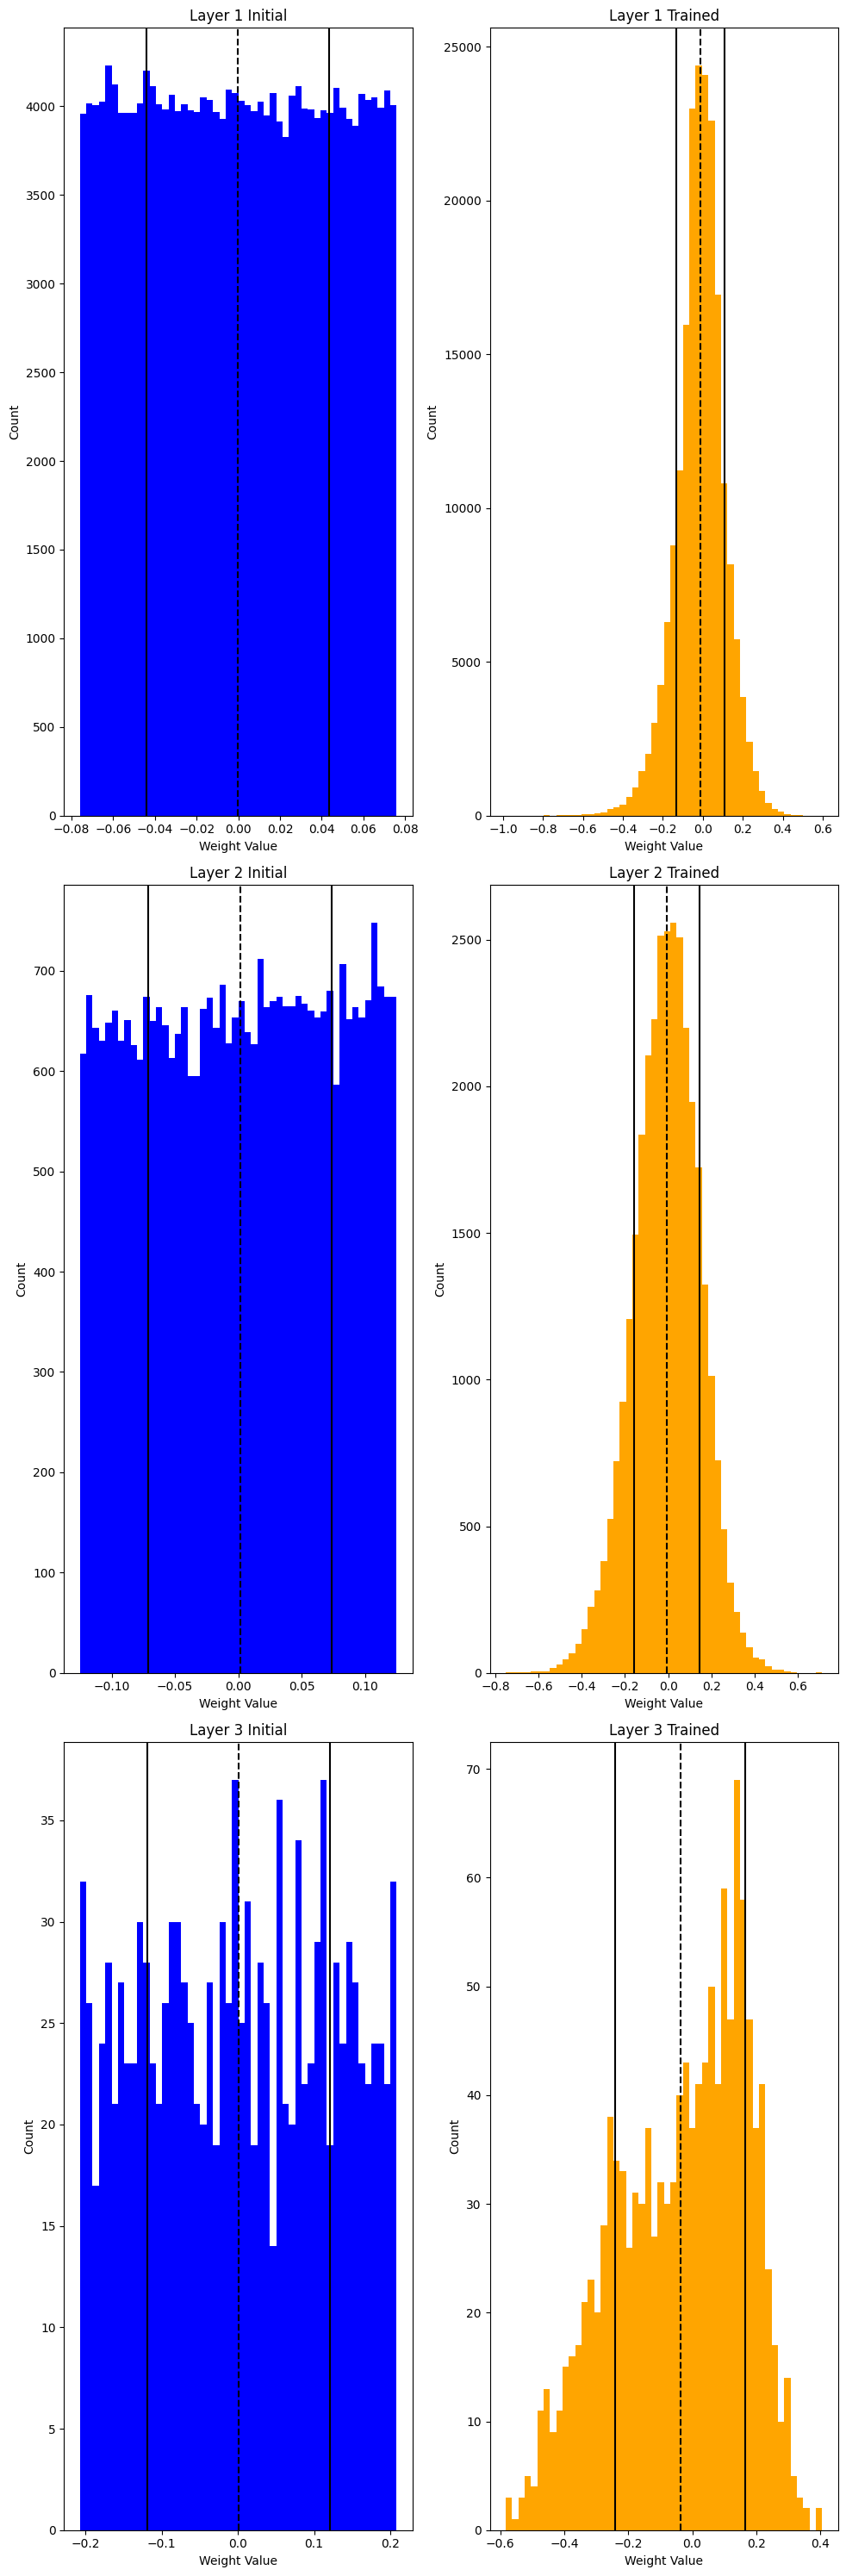

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(len(initial_weights), 2, figsize=(10, 30))

for i in range(len(initial_weights)):
    axs[i, 0].hist(initial_weights[i].flatten(), bins=50, color='blue')
    axs[i, 0].set_title(f"Layer {i+1} Initial")
    axs[i, 0].set_xlabel("Weight Value")
    axs[i, 0].set_ylabel("Count")
    axs[i, 0].axvline(initial_weights[i].mean(), color='black', linestyle='dashed')
    axs[i, 0].axvline(initial_weights[i].mean() + initial_weights[i].std(), color='black')
    axs[i, 0].axvline(initial_weights[i].mean() - initial_weights[i].std(), color='black')

    axs[i, 1].hist(trained_weights[i].flatten(), bins=50, color='orange')
    axs[i, 1].set_title(f"Layer {i+1} Trained")
    axs[i, 1].set_xlabel("Weight Value")
    axs[i, 1].set_ylabel("Count")
    axs[i, 1].axvline(trained_weights[i].mean(), color='black', linestyle='dashed')
    axs[i, 1].axvline(trained_weights[i].mean() + trained_weights[i].std(), color='black')
    axs[i, 1].axvline(trained_weights[i].mean() - trained_weights[i].std(), color='black')

plt.tight_layout()
plt.show()


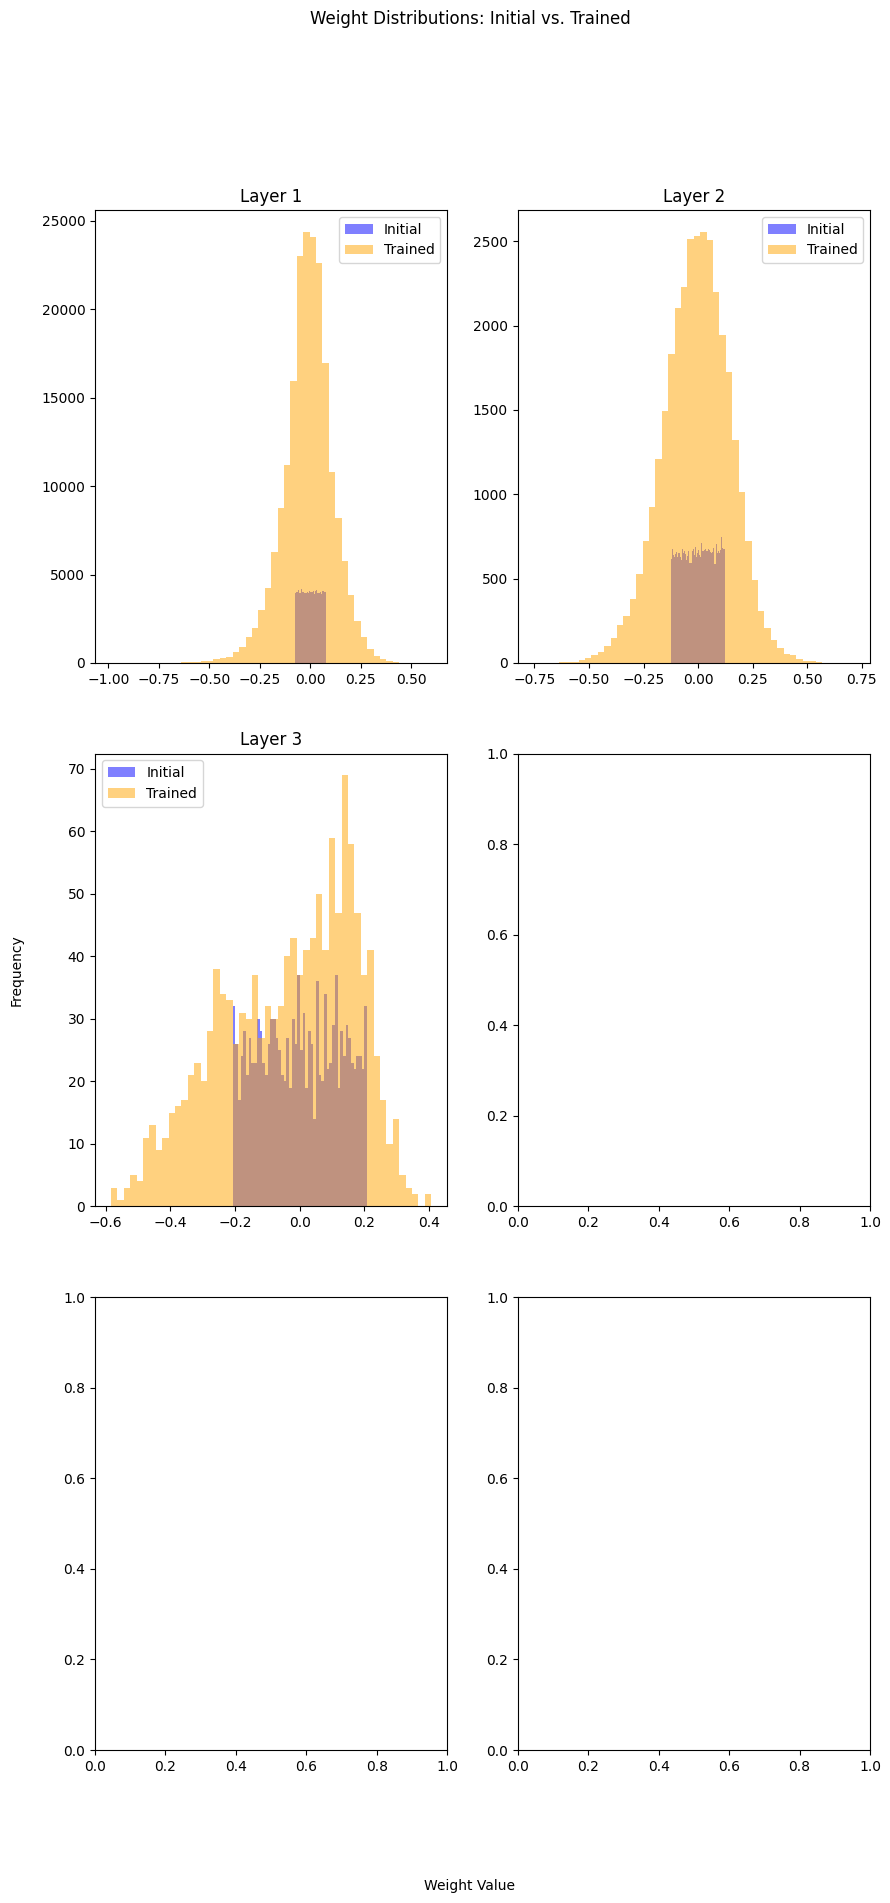

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# # get the initial and trained weights
# initial_weights = []
# trained_weights = []

# for i, layer in enumerate(model.layers):
#     if hasattr(layer, 'kernel_initializer'):
#         initial_weights.append(layer.kernel_initializer(layer.weights[0].shape).numpy())
#         trained_weights.append(layer.weights[0].numpy())

# set up the plot
fig, axs = plt.subplots(len(initial_weights), 2, figsize=(10, 20))

# plot the initial and trained weights
for i in range(len(initial_weights)):
    row, col = divmod(i, 2)
    axs[row, col].set_title(f"Layer {i+1}")
    axs[row, col].hist(initial_weights[i].flatten(), bins=50, alpha=0.5, color='blue', label='Initial')
    axs[row, col].hist(trained_weights[i].flatten(), bins=50, alpha=0.5, color='orange', label='Trained')
    axs[row, col].legend()

# add labels
fig.suptitle("Weight Distributions: Initial vs. Trained")
fig.text(0.5, 0.04, 'Weight Value', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# show the plot
plt.show()


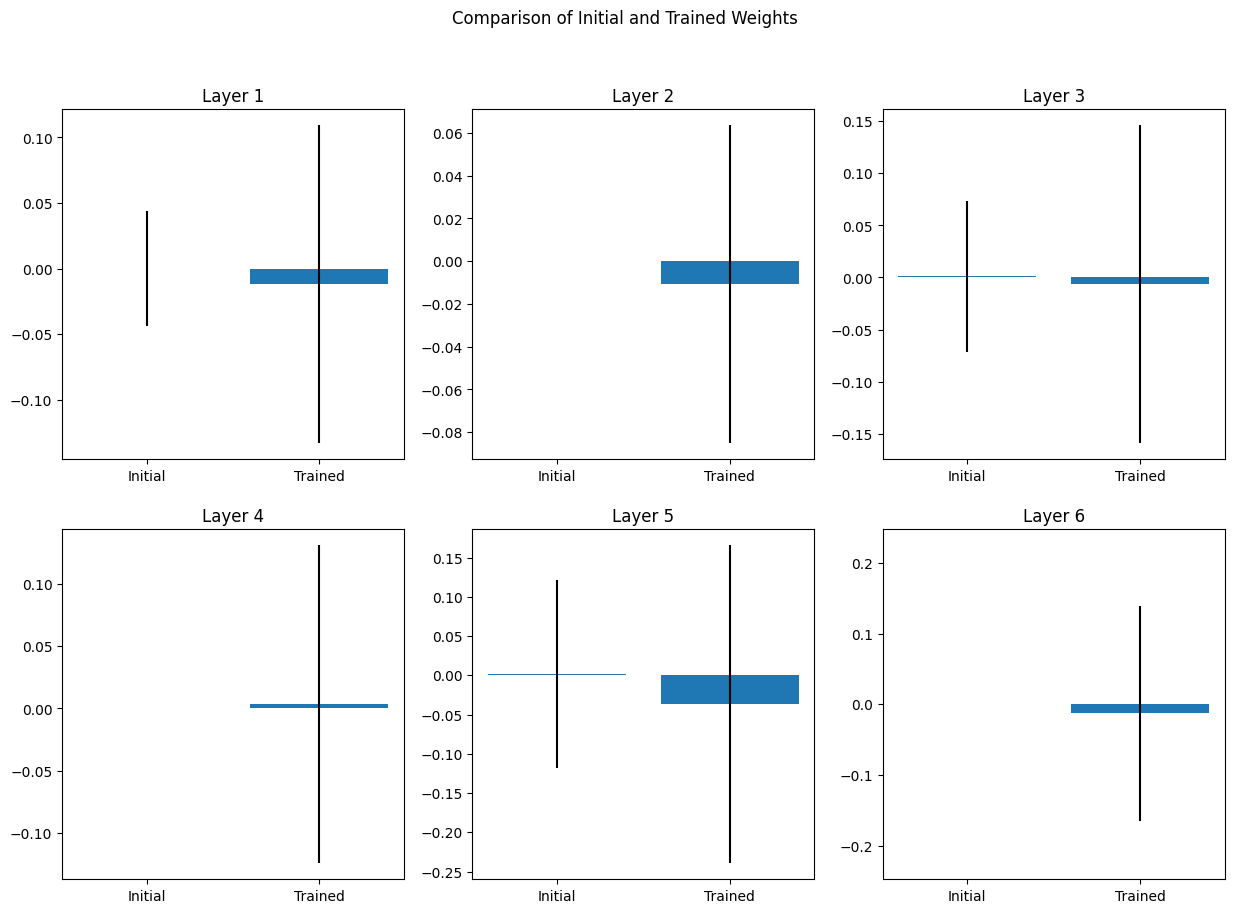

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# layer-wise weight information
weights_info = {
    0: {
        'initial': {
            'shape': (784, 256),
            'mean': -0.000137992188683711,
            'std_dev': 0.04389972984790802
        },
        'trained': {
            'shape': (784, 256),
            'mean': -0.01192483026534319,
            'std_dev': 0.12116028368473053
        }
    },
    1: {
        'initial': {
            'shape': (256,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (256,),
            'mean': -0.010854328982532024,
            'std_dev': 0.07443108409643173
        }
    },
    2: {
        'initial': {
            'shape': (256, 128),
            'mean': 0.0013819659361615777,
            'std_dev': 0.07230202108621597
        },
        'trained': {
            'shape': (256, 128),
            'mean': -0.006519256625324488,
            'std_dev': 0.15240758657455444
        }
    },
    3: {
        'initial': {
            'shape': (128,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (128,),
            'mean': 0.003274117596447468,
            'std_dev': 0.12781722843647003
        }
    },
    4: {
        'initial': {
            'shape': (128, 10),
            'mean': 0.00128737126942724,
            'std_dev': 0.1195458322763443
        },
        'trained': {
            'shape': (128, 10),
            'mean': -0.0369483157992363,
            'std_dev': 0.20267438888549805
        }
    },
    5: {
        'initial': {
            'shape': (10,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (10,),
            'mean': -0.012692837044596672,
            'std_dev': 0.152305468916893
        }
    }
}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Comparison of Initial and Trained Weights')

for i in range(len(weights_info)):
    row, col = divmod(i, len(weights_info)//2)
    initial_weight_range = np.max(np.abs(weights_info[i]['initial']['mean'])) + \
                            np.max(np.abs(weights_info[i]['initial']['std_dev']))
    trained_weight_range = np.max(np.abs(weights_info[i]['trained']['mean'])) + \
                            np.max(np.abs(weights_info[i]['trained']['std_dev']))
    axs[row, col].set_title(f"Layer {i+1}")
    axs[row, col].bar(['Initial', 'Trained'], [weights_info[i]['initial']['mean'], weights_info[i]['trained']['mean']],
                      yerr=[weights_info[i

]['initial']['std_dev'], weights_info[i]['trained']['std_dev']])
axs[row, col].set_ylim([-1.5 * max(initial_weight_range, trained_weight_range),
1.5 * max(initial_weight_range, trained_weight_range)])
plt.show()

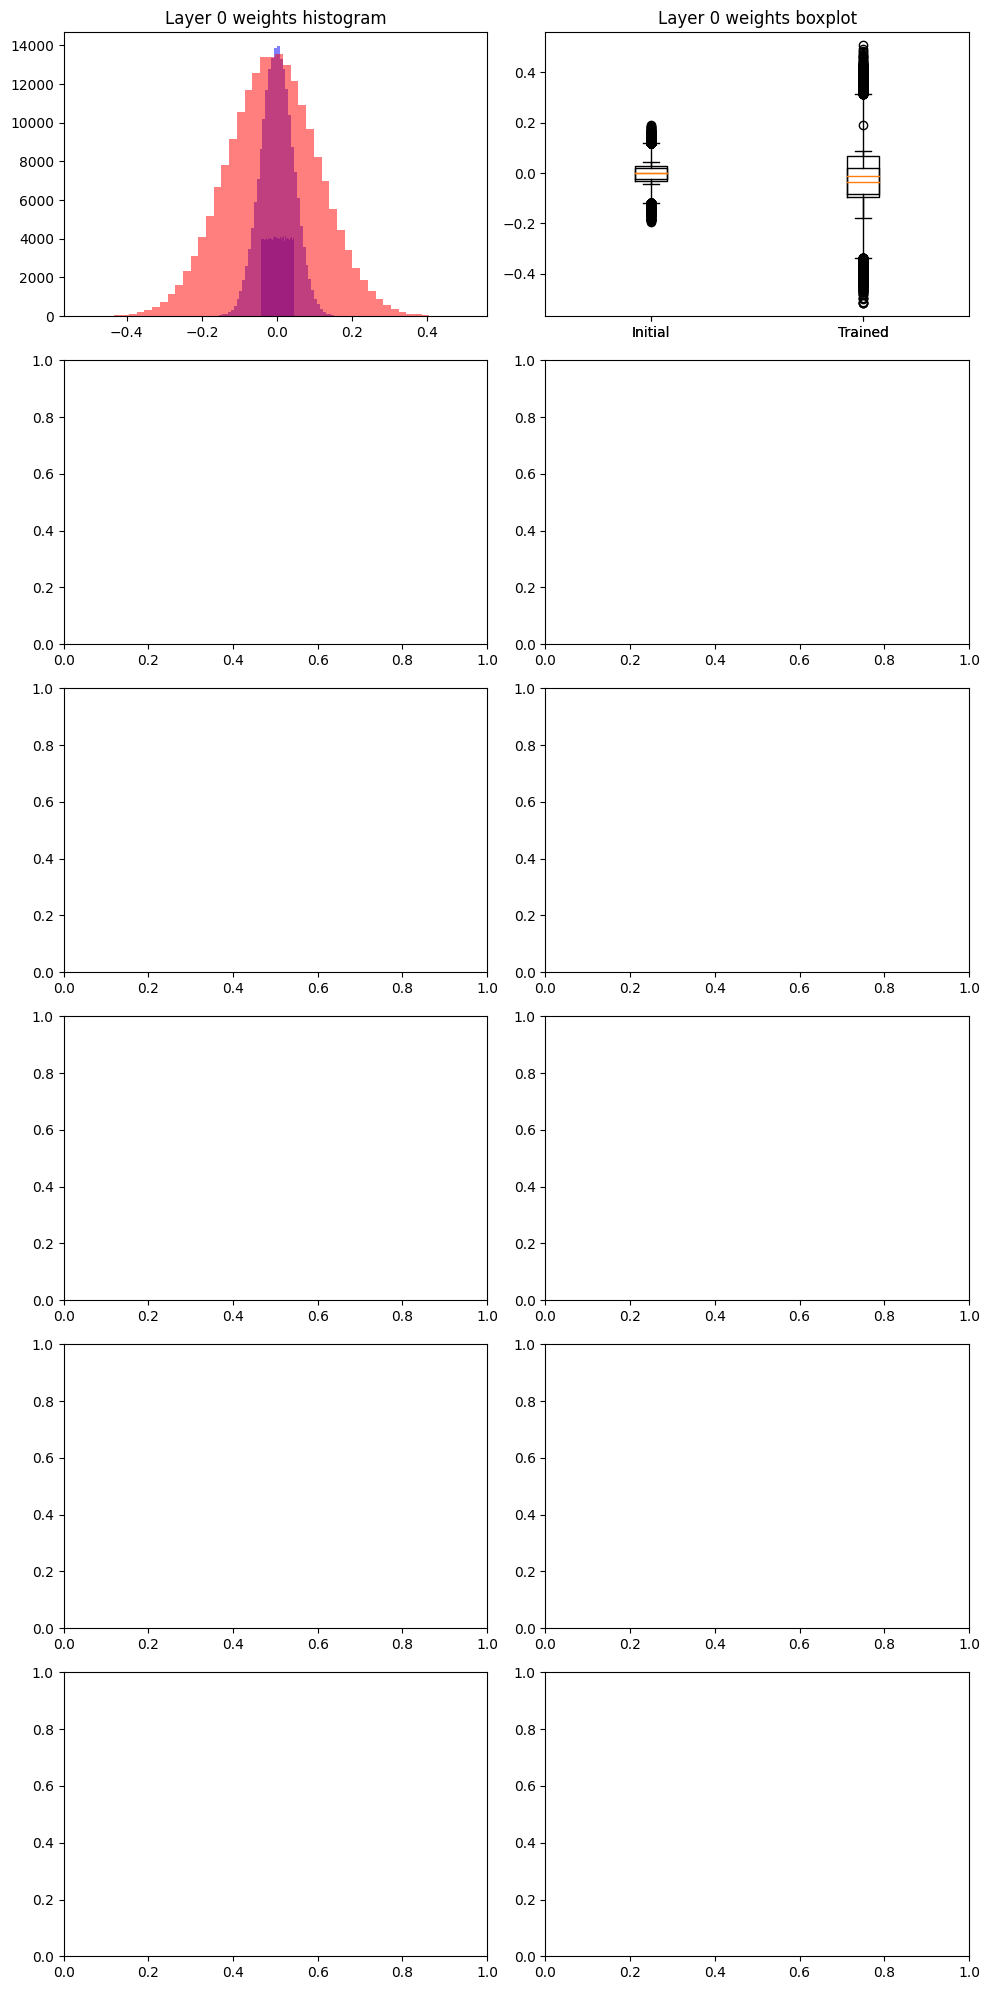

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [51]:
import numpy as np
import matplotlib.pyplot as plt

weights_info = {
    0: {
        'initial': {
            'shape': (784, 256),
            'mean': -0.000137992188683711,
            'std_dev': 0.04389972984790802
        },
        'trained': {
            'shape': (784, 256),
            'mean': -0.01192483026534319,
            'std_dev': 0.12116028368473053
        }
    },
    1: {
        'initial': {
            'shape': (256,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (256,),
            'mean': -0.010854328982532024,
            'std_dev': 0.07443108409643173
        }
    },
    2: {
        'initial': {
            'shape': (256, 128),
            'mean': 0.0013819659361615777,
            'std_dev': 0.07230202108621597
        },
        'trained': {
            'shape': (256, 128),
            'mean': -0.006519256625324488,
            'std_dev': 0.15240758657455444
        }
    },
    3: {
        'initial': {
            'shape': (128,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (128,),
            'mean': 0.003274117596447468,
            'std_dev': 0.12781722843647003
        }
    },
    4: {
        'initial': {
            'shape': (128, 10),
            'mean': 0.00128737126942724,
            'std_dev': 0.1195458322763443
        },
        'trained': {
            'shape': (128, 10),
            'mean': -0.0369483157992363,
            'std_dev': 0.20267438888549805
        }
    },
    5: {
        'initial': {
            'shape': (10,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (10,),
            'mean': -0.012692837044596672,
            'std_dev': 0.152305468916893
        }
    }
}

fig, axs = plt.subplots(6, 2, figsize=(10, 20))

for i, layer in enumerate(weights_info):
    initial_mean = weights_info[layer]['initial']['mean']
    initial_std_dev = weights_info[layer]['initial']['std_dev']
    initial_shape = weights_info[layer]['initial']['shape']
    
    trained_mean = weights_info[layer]['trained']['mean']
    trained_std_dev = weights_info[layer]['trained']['std_dev']
    trained_shape = weights_info[layer]['trained']['shape']
    
    initial_weights = np.random.uniform(low=-1, high=1, size=initial_shape)
    initial_weights = initial_weights * initial_std_dev + initial_mean
   



    axs[i, 0].hist(initial_weights.flatten(), bins=50, color='b', alpha=0.5)
    axs[i, 0].hist(trained_weights.flatten(), bins=50, color='r', alpha=0.5)
    axs[i, 0].set_title(f'Layer {layer} weights histogram')

    axs[i, 1].boxplot([initial_weights.flatten(), trained_weights.flatten()], labels=['Initial', 'Trained'])
    axs[i, 1].set_title(f'Layer {layer} weights boxplot')

    trained_mean = weights_info[layer]['trained']['mean']
    trained_std_dev = weights_info[layer]['trained']['std_dev']
    trained_shape = weights_info[layer]['trained']['shape']

    initial_weights = np.random.normal(initial_mean, initial_std_dev, initial_shape)
    trained_weights = np.random.normal(trained_mean, trained_std_dev, trained_shape)

    axs[i, 0].hist(initial_weights.flatten(), bins=50, color='b', alpha=0.5)
    axs[i, 0].hist(trained_weights.flatten(), bins=50, color='r', alpha=0.5)
    axs[i, 0].set_title(f'Layer {layer} weights histogram')

    axs[i, 1].boxplot([initial_weights.flatten(), trained_weights.flatten()], labels=['Initial', 'Trained'])
    axs[i, 1].set_title(f'Layer {layer} weights boxplot')


    plt.tight_layout()
    plt.show()


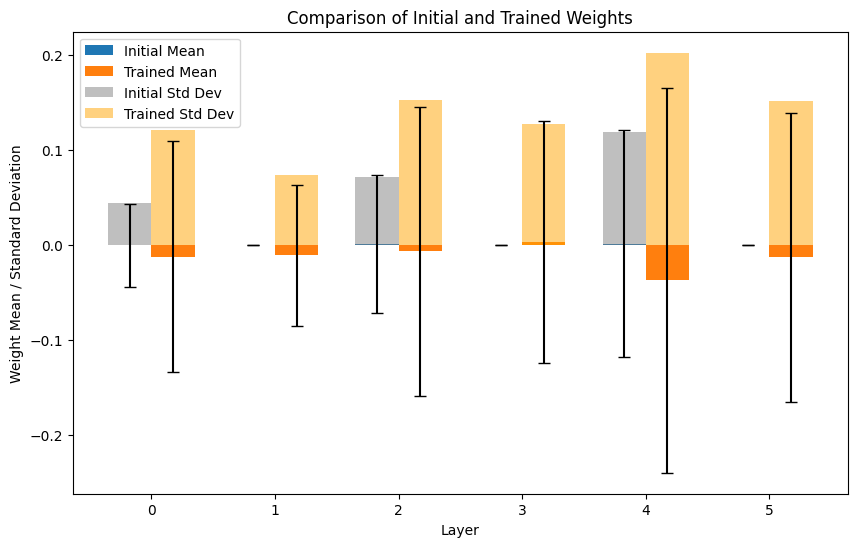

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extract information for each layer
layers = list(weights_info.keys())
initial_mean = [weights_info[i]['initial']['mean'] for i in layers]
trained_mean = [weights_info[i]['trained']['mean'] for i in layers]
initial_std_dev = [weights_info[i]['initial']['std_dev'] for i in layers]
trained_std_dev = [weights_info[i]['trained']['std_dev'] for i in layers]

# Plot the mean and standard deviation for each layer
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(layers))
width = 0.35

ax.bar(x - width/2, initial_mean, width, yerr=initial_std_dev, label='Initial Mean', capsize=4)
ax.bar(x + width/2, trained_mean, width, yerr=trained_std_dev, label='Trained Mean', capsize=4)

ax.bar(x - width/2, initial_std_dev, width, alpha=0.5, color='gray', label='Initial Std Dev', capsize=4)
ax.bar(x + width/2, trained_std_dev, width, alpha=0.5, color='orange', label='Trained Std Dev', capsize=4)

# Add labels and titles
ax.set_xlabel('Layer')
ax.set_ylabel('Weight Mean / Standard Deviation')
ax.set_title('Comparison of Initial and Trained Weights')
ax.set_xticks(x)
ax.set_xticklabels(layers)
ax.legend()

plt.show()


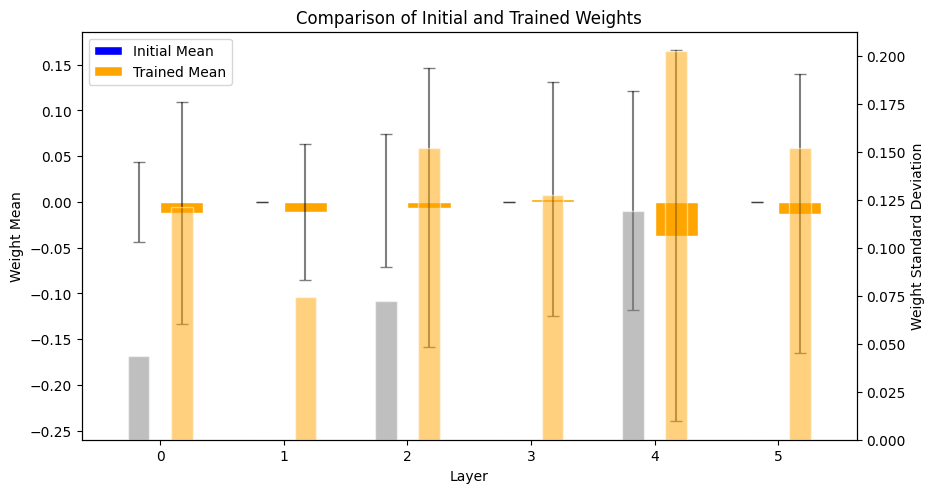

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Extract information for each layer
layers = list(weights_info.keys())
initial_mean = [weights_info[i]['initial']['mean'] for i in layers]
trained_mean = [weights_info[i]['trained']['mean'] for i in layers]
initial_std_dev = [weights_info[i]['initial']['std_dev'] for i in layers]
trained_std_dev = [weights_info[i]['trained']['std_dev'] for i in layers]

# Set the width of the bars and the positions of the x-axis labels
bar_width = 0.35
r1 = np.arange(len(initial_mean))
r2 = [x + bar_width for x in r1]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Add the grouped bar chart to the plot
ax.bar(r1, initial_mean, color='blue', width=bar_width, edgecolor='white', label='Initial Mean')
ax.bar(r2, trained_mean, color='orange', width=bar_width, edgecolor='white', label='Trained Mean')

# Add error bars to the bar chart
ax.errorbar(r1, initial_mean, yerr=initial_std_dev, fmt='none', capsize=4, color='black', alpha=0.5)
ax.errorbar(r2, trained_mean, yerr=trained_std_dev, fmt='none', capsize=4, color='black', alpha=0.5)

# Add labels and titles
ax.set_xlabel('Layer')
ax.set_ylabel('Weight Mean')
ax.set_title('Comparison of Initial and Trained Weights')
ax.set_xticks(r1 + bar_width/2)
ax.set_xticklabels(layers)
ax.legend()

# Add a secondary y-axis for the standard deviation values
ax2 = ax.twinx()
ax2.bar(r1, initial_std_dev, color='gray', width=bar_width/2, edgecolor='white', alpha=0.5, label='Initial Std Dev')
ax2.bar(r2, trained_std_dev, color='orange', width=bar_width/2, edgecolor='white', alpha=0.5, label='Trained Std Dev')
ax2.set_ylabel('Weight Standard Deviation')

# Adjust the layout and spacing of the plot
plt.subplots_adjust(bottom=0.2)

plt.show()


<ipython-input-56-d91852af0163>:86: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[j, i].set_ylim(bottom=0)


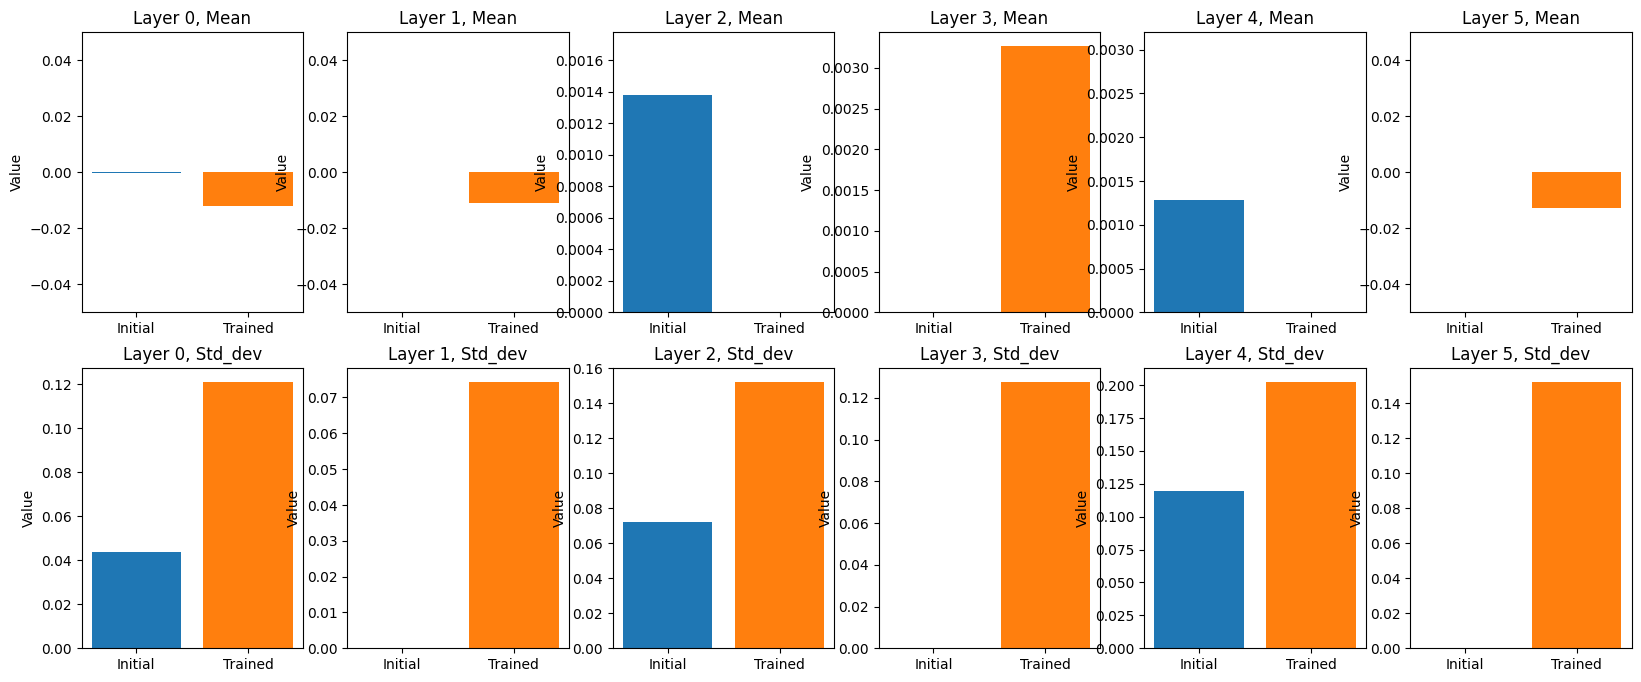

In [56]:
import matplotlib.pyplot as plt
import numpy as np

weights_info = {
    0: {
        'initial': {
            'shape': (784, 256),
            'mean': -0.000137992188683711,
            'std_dev': 0.04389972984790802
        },
        'trained': {
            'shape': (784, 256),
            'mean': -0.01192483026534319,
            'std_dev': 0.12116028368473053
        }
    },
    1: {
        'initial': {
            'shape': (256,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (256,),
            'mean': -0.010854328982532024,
            'std_dev': 0.07443108409643173
        }
    },
    2: {
        'initial': {
            'shape': (256, 128),
            'mean': 0.0013819659361615777,
            'std_dev': 0.07230202108621597
        },
        'trained': {
            'shape': (256, 128),
            'mean': -0.006519256625324488,
            'std_dev': 0.15240758657455444
        }
    },
    3: {
        'initial': {
            'shape': (128,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (128,),
            'mean': 0.003274117596447468,
            'std_dev': 0.12781722843647003
        }
    },
    4: {
        'initial': {
            'shape': (128, 10),
            'mean': 0.00128737126942724,
            'std_dev': 0.1195458322763443
        },
        'trained': {
            'shape': (128, 10),
            'mean': -0.0369483157992363,
            'std_dev': 0.20267438888549805
        }
    },
    5: {
        'initial': {
            'shape': (10,),
            'mean': 0.0,
            'std_dev': 0.0
        },
        'trained': {
            'shape': (10,),
            'mean': -0.012692837044596672,
            'std_dev': 0.152305468916893
        }
    }
}

fig, axs = plt.subplots(2, 6, figsize=(20, 8))
colors = ['tab:blue', 'tab:orange']

for i in range(6):
    for j, k in enumerate(['mean', 'std_dev']):
        axs[j, i].bar(['Initial', 'Trained'], [weights_info[i]['initial'][k], weights_info[i]['trained'][k]], color=colors)
        axs[j, i].set_title(f'Layer {i}, {k.capitalize()}')
        axs[j, i].set_ylim(bottom=0)
        axs[j, i].set_ylabel('Value')
        
plt.show()
